# Projekt nr 1

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

Wczytujemy plik z danymi

In [65]:
file_path = './data/song_data.csv'
df = pd.read_csv(file_path)

### Przeglad danych<!--  --><!--  -->

In [66]:
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


### Usunięcie kolumn

In [67]:
df = df.drop(columns = ['song_name', 'key'])

In [68]:
df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   18835 non-null  int64  
 1   song_duration_ms  18835 non-null  int64  
 2   acousticness      18835 non-null  float64
 3   danceability      18835 non-null  float64
 4   energy            18835 non-null  float64
 5   instrumentalness  18835 non-null  float64
 6   liveness          18835 non-null  float64
 7   loudness          18835 non-null  float64
 8   audio_mode        18835 non-null  int64  
 9   speechiness       18835 non-null  float64
 10  tempo             18835 non-null  float64
 11  time_signature    18835 non-null  int64  
 12  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(4)
memory usage: 1.9 MB


In [70]:
df.columns

Index(['song_popularity', 'song_duration_ms', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence'],
      dtype='object')

### Histogramy dla wszystkich cech numerycznych

array([[<Axes: title={'center': 'song_popularity'}>,
        <Axes: title={'center': 'song_duration_ms'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'audio_mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'time_signature'}>],
       [<Axes: title={'center': 'audio_valence'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

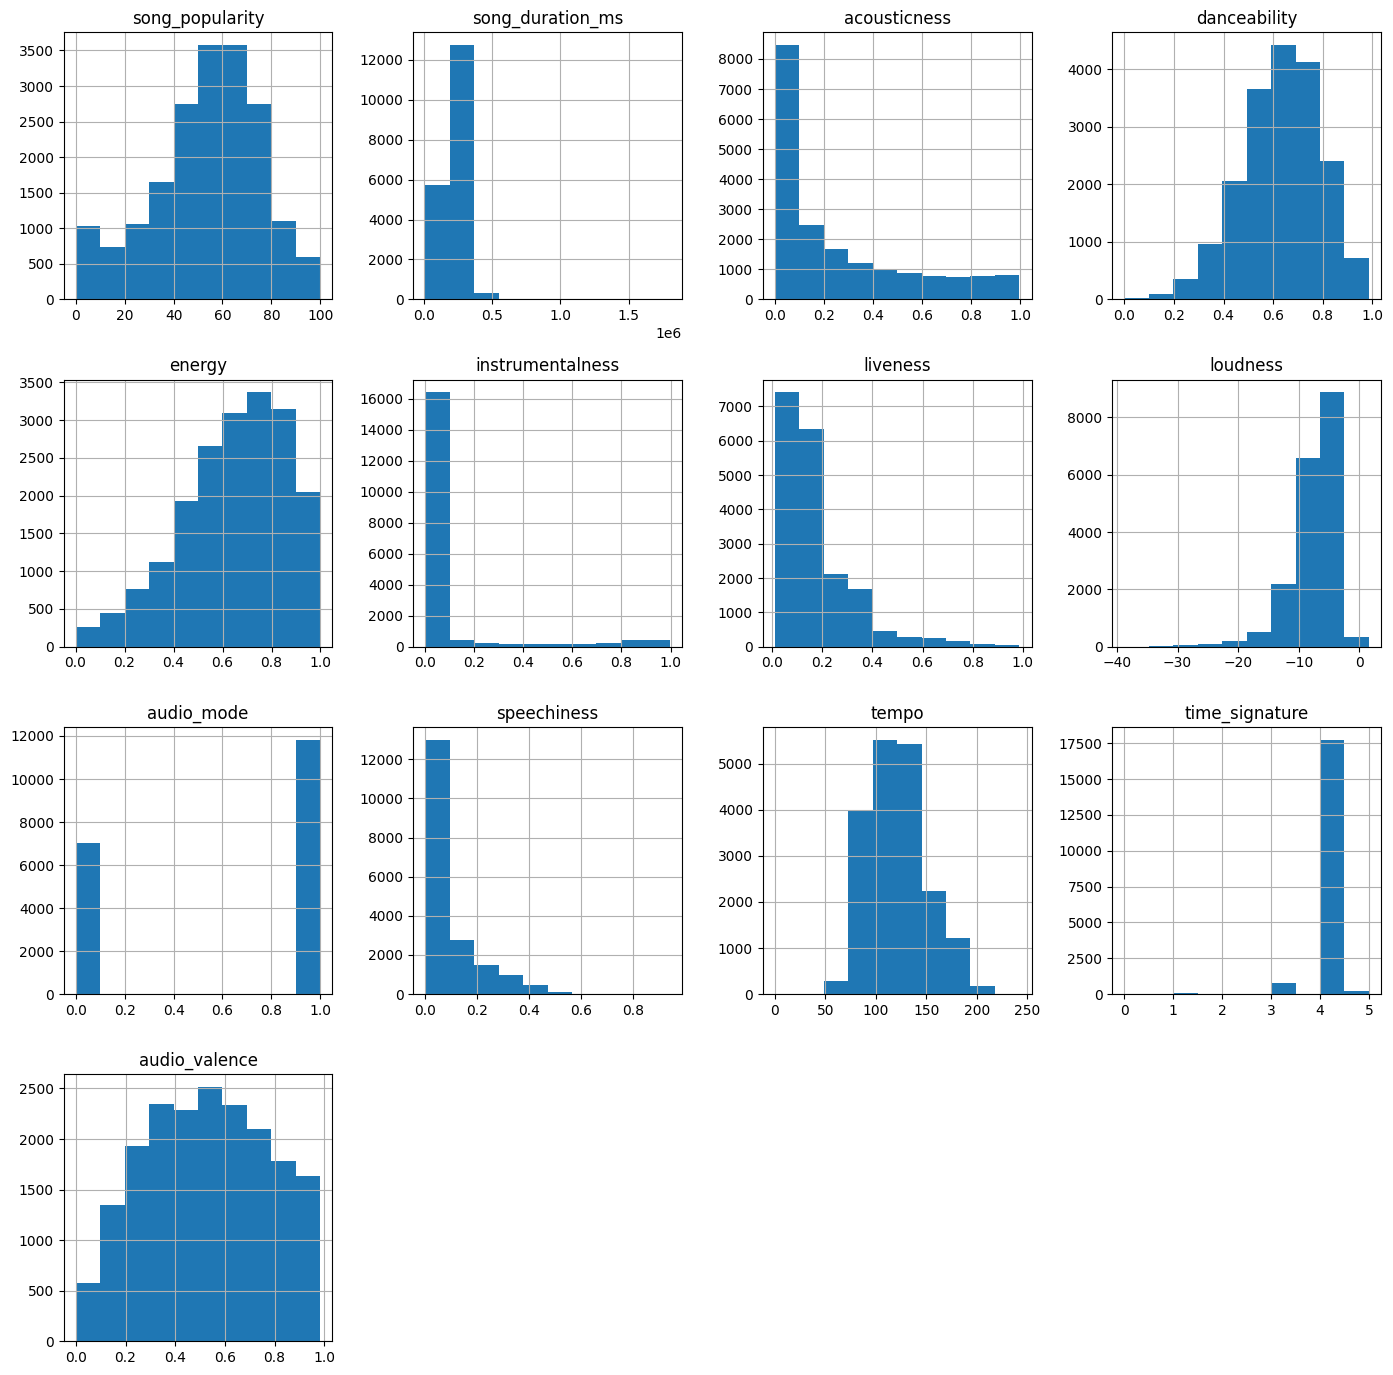

In [71]:
df.hist(figsize=(17,17))

### Pairplot – wybrane cechy numeryczne

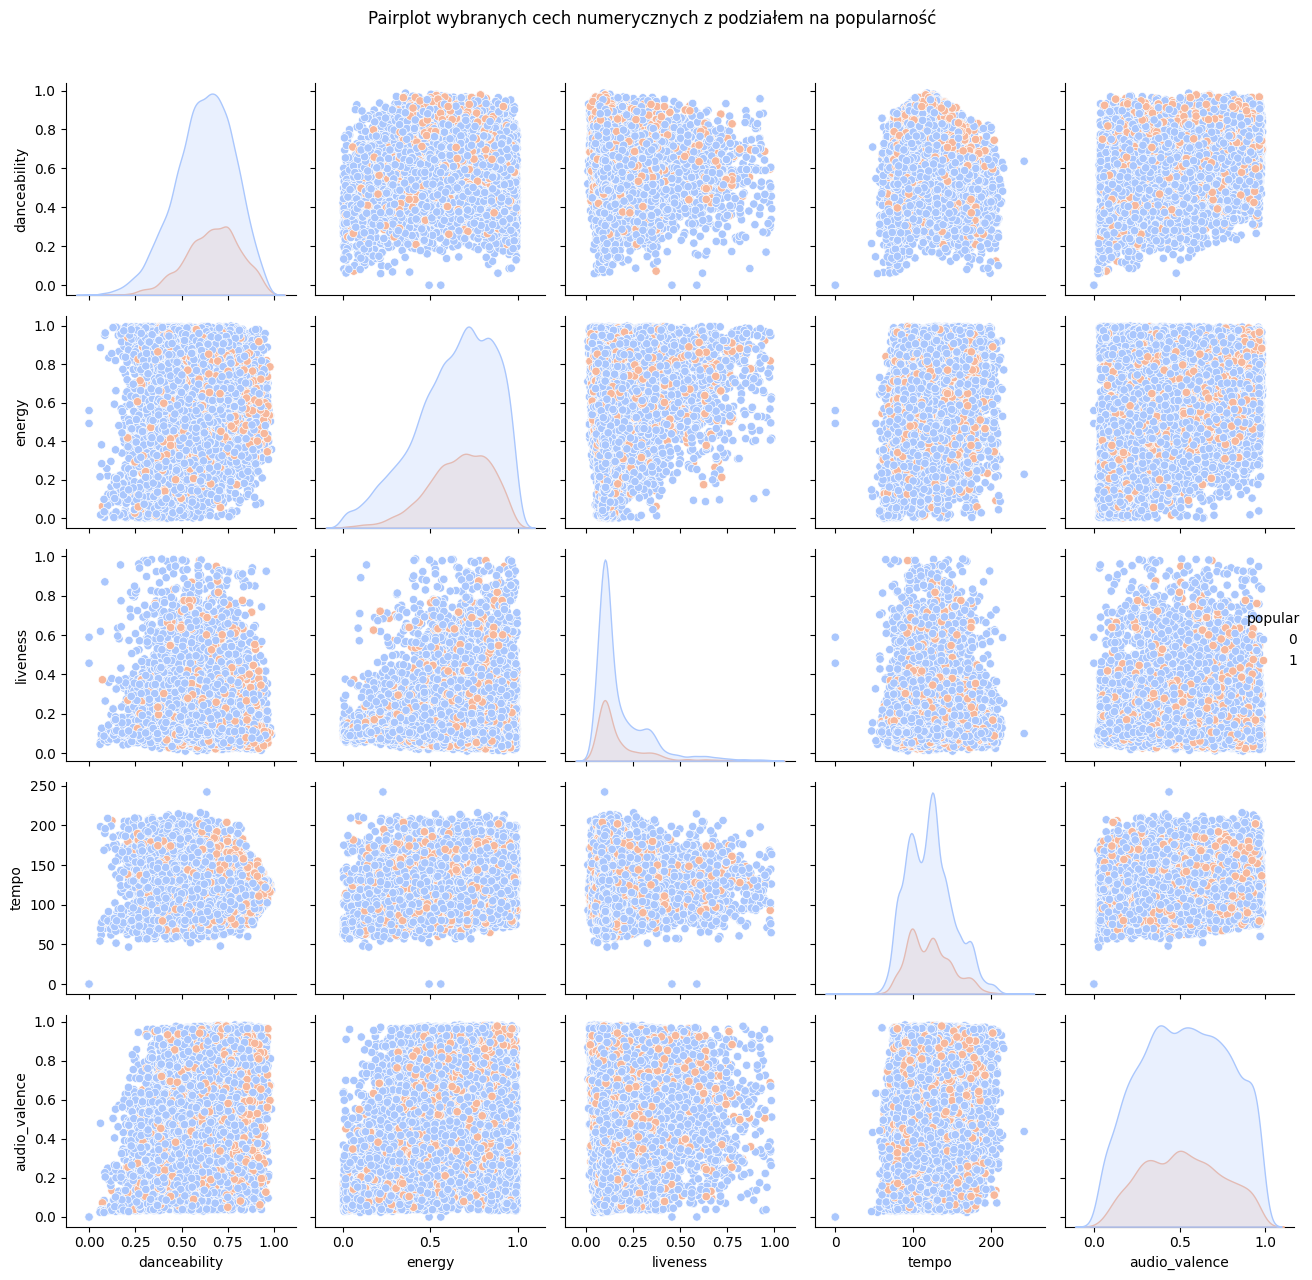

In [72]:
# zamiana popularności na kolumne binarna [0-70) = 0, [70-100] = 1
df_pairplot = df.copy()
df_pairplot['popular'] = (df_pairplot['song_popularity'] >= 70).astype(int)

# wybrane kolumny do pairplotu
chosen_column = ['danceability', 'energy', 'liveness', 'tempo', 'audio_valence', 'popular']

# pairplot
sns.pairplot(df_pairplot[chosen_column], hue='popular', palette='coolwarm')
plt.suptitle("Pairplot wybranych cech numerycznych z podziałem na popularność", y=1.02)
plt.tight_layout()
plt.show()

### Lista kolumn do skalowania

In [73]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

### Macierz korelacji

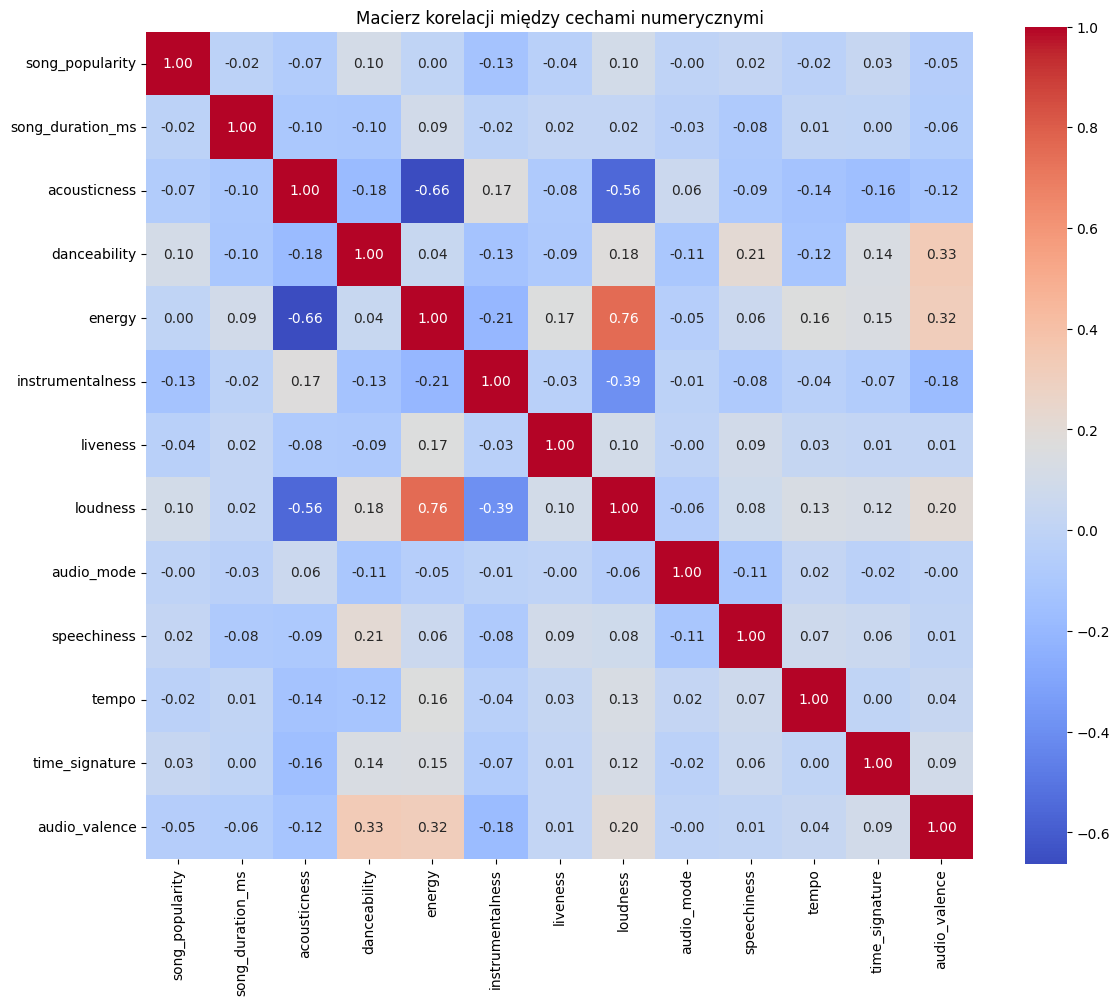

In [74]:
corr_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Macierz korelacji między cechami numerycznymi")
plt.tight_layout()
plt.show()

### Jeśli braków nie ma — dodajmy je ręcznie (np. 10% losowo w kolumnie 'danceability')

In [75]:
missing = df.isnull().sum().sum()

df_random_nan = df.copy()

if missing.sum() == 0:
    np.random.seed(42)
    mask = np.random.rand(len(df_random_nan)) < 0.1
    df_random_nan.loc[mask, 'danceability'] = np.nan
    print(f"\nSymulowano braki danych: {df_random_nan['danceability'].isnull().sum()} w kolumnie 'danceability'")



Symulowano braki danych: 1907 w kolumnie 'danceability'


### Metoda 1 – uzupełnianie średnią

In [76]:
df_mean_filled = df_random_nan.copy()
df_mean_filled['danceability'] = df_mean_filled['danceability'].fillna(df_mean_filled['danceability'].mean())

### Metoda 2 – uzupełnianie medianą

In [77]:
df_median_filled = df_random_nan.copy()
df_median_filled['danceability'] = df_median_filled['danceability'].fillna(df_median_filled['danceability'].median())

### Analiza danych

In [78]:
for column in df_random_nan.columns:
    print("* * * * * * * * * * * *")
    print(column)
    print(df_random_nan.sort_values(column)[column].unique())

* * * * * * * * * * * *
song_popularity
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]
* * * * * * * * * * * *
song_duration_ms
[  12000   26186   31373 ... 1233666 1355938 1799346]
* * * * * * * * * * * *
acousticness
[1.02e-06 1.36e-06 1.37e-06 ... 9.94e-01 9.95e-01 9.96e-01]
* * * * * * * * * * * *
danceability
[0.     0.0594 0.0617 0.0625 0.066  0.0674 0.0684 0.0722 0.081  0.0819
 0.0833 0.0855 0.0868 0.0874 0.0962 0.101  0.102  0.105  0.107  0.116
 0.118  0.119  0.121  0.123  0.124  0.127  0.13   0.131  0.134  0.137
 0.138  0.139  0.14   0.143  0.145  0.146  0.147  0.149  0.15   0.151
 0.155  0.157  0.158  0.161  0.162  0.1

### Standaryzacja (średnia = 0, std = 1)

In [79]:
scaler_standard = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[numeric_columns] = scaler_standard.fit_transform(df[numeric_columns])

### Normalizacja Min-Max (do zakresu [0,1])

In [80]:
scaler_minmax = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[numeric_columns] = scaler_minmax.fit_transform(df[numeric_columns])

In [81]:
print(df_minmax_scaled.describe())

       song_popularity  song_duration_ms  acousticness  danceability  \
count     18835.000000      18835.000000  18835.000000  18835.000000   
mean          0.529919          0.115373      0.259577      0.641690   
std           0.219057          0.033506      0.289879      0.158787   
min           0.000000          0.000000      0.000000      0.000000   
25%           0.400000          0.096422      0.024196      0.540020   
50%           0.560000          0.111509      0.132529      0.653495   
75%           0.690000          0.129155      0.425702      0.757852   
max           1.000000          1.000000      1.000000      1.000000   

             energy  instrumentalness      liveness      loudness  \
count  18835.000000      18835.000000  18835.000000  18835.000000   
mean       0.645260          0.078243      0.173059      0.776164   
std        0.214545          0.222257      0.147661      0.094859   
min        0.000000          0.000000      0.000000      0.000000   
25%   

In [82]:
print(df_standard_scaled.describe())

       song_popularity  song_duration_ms  acousticness  danceability  \
count     1.883500e+04      1.883500e+04  1.883500e+04  1.883500e+04   
mean      1.177007e-16     -1.086468e-16 -7.846716e-17  3.365034e-16   
std       1.000027e+00      1.000027e+00  1.000027e+00  1.000027e+00   
min      -2.419160e+00     -3.443405e+00 -8.954899e-01 -4.041309e+00   
25%      -5.930990e-01     -5.656099e-01 -8.120190e-01 -6.403076e-01   
50%       1.373254e-01     -1.153123e-01 -4.382892e-01  7.434940e-02   
75%       7.307953e-01      4.113221e-01  5.731020e-01  7.315786e-01   
max       2.145993e+00      2.640243e+01  2.554320e+00  2.256606e+00   

             energy  instrumentalness      liveness      loudness  \
count  1.883500e+04      1.883500e+04  1.883500e+04  1.883500e+04   
mean   6.775337e-16      1.961679e-17  3.470663e-17  3.319764e-16   
std    1.000027e+00      1.000027e+00  1.000027e+00  1.000027e+00   
min   -3.007658e+00     -3.520461e-01 -1.172037e+00 -8.182544e+00   
25%   

### Lista kolumn do analizy (wszystkie numeryczne bez popularity)

In [83]:
numeric_columns = df_standard_scaled.select_dtypes(include=['float64', 'int64']).columns.drop('song_popularity')

### Analiza wszystkich kolumn

### PCA

In [84]:
df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


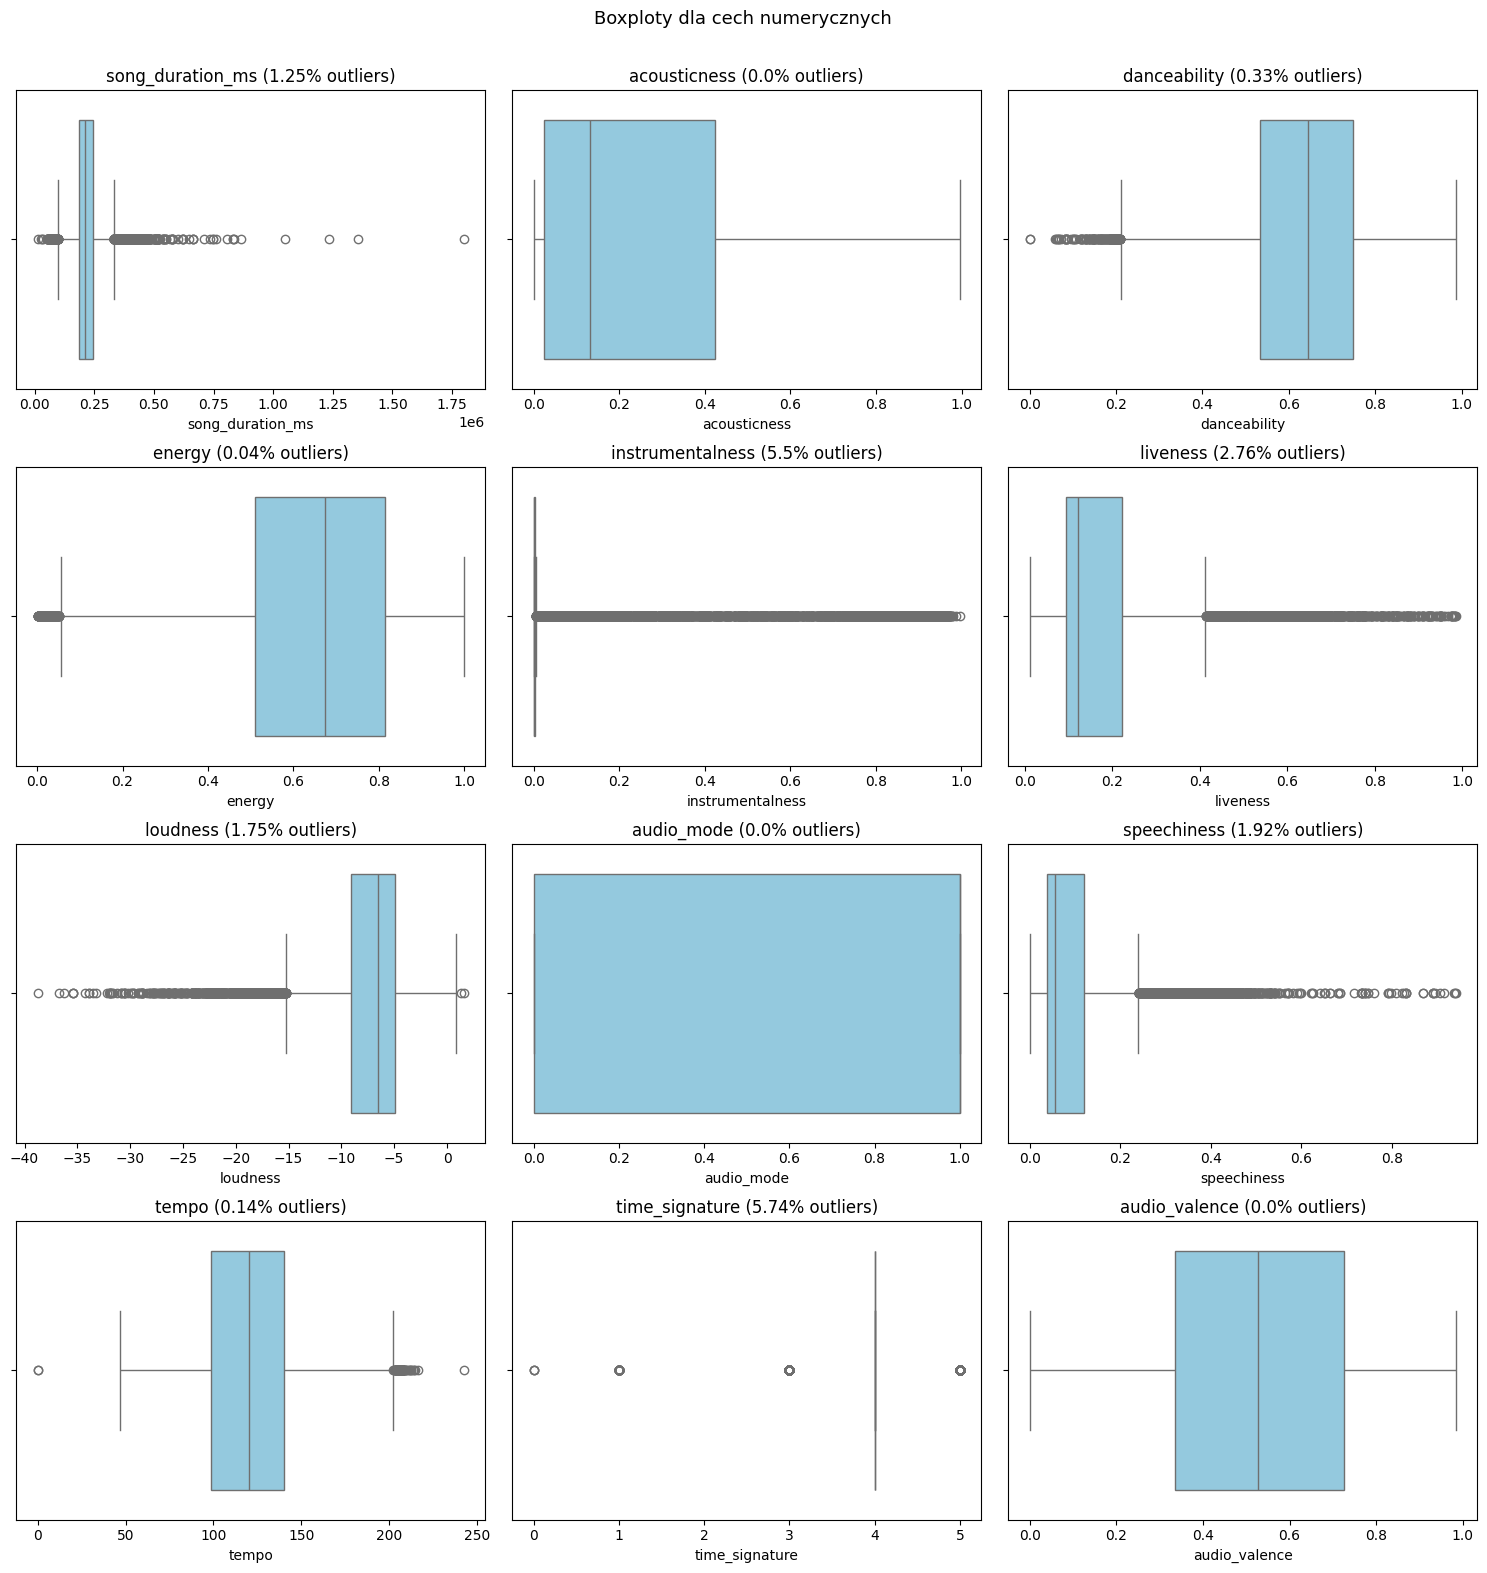

Podsumowanie wartości odstających:
song_duration_ms    : 236 outlierów (1.25%)
acousticness        : 0 outlierów (0.0%)
danceability        : 62 outlierów (0.33%)
energy              : 7 outlierów (0.04%)
instrumentalness    : 1036 outlierów (5.5%)
liveness            : 519 outlierów (2.76%)
loudness            : 330 outlierów (1.75%)
audio_mode          : 0 outlierów (0.0%)
speechiness         : 361 outlierów (1.92%)
tempo               : 26 outlierów (0.14%)
time_signature      : 1081 outlierów (5.74%)
audio_valence       : 0 outlierów (0.0%)


In [85]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.drop('song_popularity')

# podsumowanie outlierów
outliers_summary = {}

# ustawienia wykresów
n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

# boxploty i liczenie outlierów
for i, col in enumerate(numeric_columns):
    z_scores = zscore(df[col])
    outliers = df[np.abs(z_scores) > 3]
    count_outliers = len(outliers)
    percent = round(100 * count_outliers / len(df), 2)
    outliers_summary[col] = (count_outliers, percent)

    sns.boxplot(x=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f"{col} ({percent}% outliers)")
    axes[i].set_xlabel(col)

# usunięcie pustych miejsc
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# wykresy
fig.suptitle("Boxploty dla cech numerycznych", fontsize=13)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

print("Podsumowanie wartości odstających:")
for col, (count, percent) in outliers_summary.items():
    print(f"{col:20}: {count} outlierów ({percent}%)")

Wybrano 8 komponentów, które łącznie tłumaczą 83.77% wariancji danych.


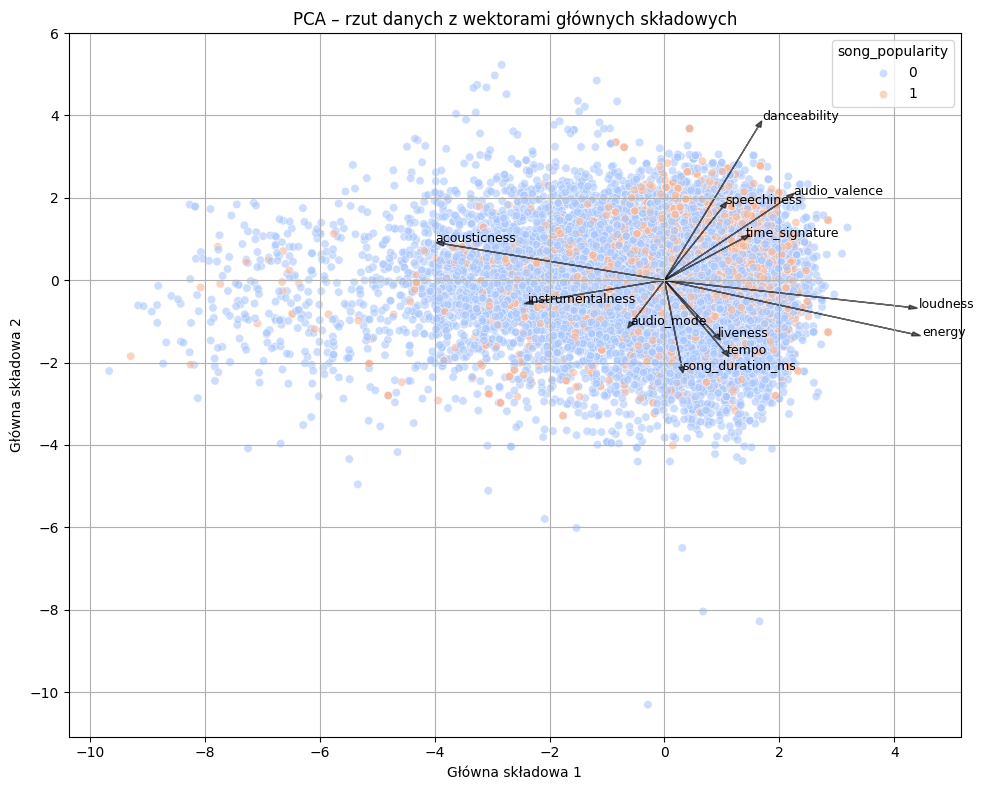

In [86]:
X = df.drop(columns=['song_popularity'])
y = (df['song_popularity'] >= 70).astype(int)

# skalowanie danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA dla wszystkich komponentów
pca_full = PCA().fit(X_scaled)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# ustalanie progu wyjaśnionej wariancji na 80%
threshold = 0.8
N = np.argmax(cumulative_variance >= threshold) + 1
X_explained = cumulative_variance[N-1] * 100

print(f"Wybrano {N} komponentów, które łącznie tłumaczą {X_explained:.2f}% wariancji danych.")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# obliczenie wektorów
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
features = X.columns

# PCA z wektorami głównych składowych
plt.figure(figsize=(10, 8))

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm', alpha=0.6)
plt.xlabel("Główna składowa 1")
plt.ylabel("Główna składowa 2")
plt.title("PCA – rzut danych z wektorami głównych składowych")

# rysowanie wektorów
for i, feature in enumerate(features):
    plt.arrow(0, 0, loadings[i, 0]*5, loadings[i, 1]*5,
              color='black', alpha=0.6, head_width=0.1)
    plt.text(loadings[i, 0]*5.2, loadings[i, 1]*5.2,
             feature, fontsize=9)

plt.grid(True)
plt.tight_layout()
plt.show()

In [87]:
# procent wyjaśnionej wariancji przez 2 pierwsze składowe
explained_variance_2 = np.sum(pca.explained_variance_ratio_) * 100
print(f"Dwie pierwsze składowe wyjaśniają {explained_variance_2:.2f}% wariancji danych.")

Dwie pierwsze składowe wyjaśniają 34.93% wariancji danych.


## ETAP 2

### 1. Podział zbioru danych (ręczny)

In [88]:
import pandas as pd
from sklearn.utils import shuffle

def manual_stratified_split(X, y, test_size=0.2, random_state=42):
    # Połączenie cech i etykiet
    data = X.copy()
    data['label'] = y

    # Podział na klasy
    class_0 = data[data['label'] == 0]
    class_1 = data[data['label'] == 1]

    # Losowe wymieszanie
    class_0 = shuffle(class_0, random_state=random_state)
    class_1 = shuffle(class_1, random_state=random_state)

    # % do testów
    n_test_0 = int(len(class_0) * test_size)
    n_test_1 = int(len(class_1) * test_size)

    # Podział
    test_data = pd.concat([class_0.iloc[:n_test_0], class_1.iloc[:n_test_1]])
    train_data = pd.concat([class_0.iloc[n_test_0:], class_1.iloc[n_test_1:]])

    # Mieszamy końcowe zbiory
    test_data = shuffle(test_data, random_state=random_state)
    train_data = shuffle(train_data, random_state=random_state)

    # Rozdzielenie
    X_train = train_data.drop(columns='label')
    y_train = train_data['label']
    X_test = test_data.drop(columns='label')
    y_test = test_data['label']

    return X_train, X_test, y_train, y_test

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

file_path = './data/song_data.csv'
df = pd.read_csv(file_path)

df = df.drop(columns = ['song_name', 'key'])

X = df.drop(columns=['song_popularity'])
y = (df['song_popularity'] >= 70).astype(int)

# Podział zbioru na train i test
X_train, X_test, y_train, y_test = manual_stratified_split(X, y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Rozkład klas w zbiorze treningowym:
label
0    0.763687
1    0.236313
Name: proportion, dtype: float64

Rozkład klas w zbiorze testowym:
label
0    0.763675
1    0.236325
Name: proportion, dtype: float64


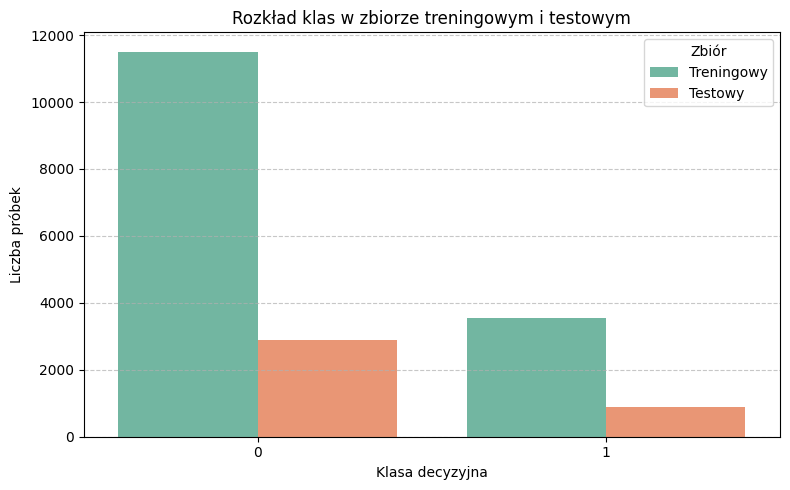

In [90]:
# Sprawdzenie proporcji klas
print("Rozkład klas w zbiorze treningowym:")
print(y_train.value_counts(normalize=True))

print("\nRozkład klas w zbiorze testowym:")
print(y_test.value_counts(normalize=True))

# Tworzymy DataFrame do porównania
train_df = pd.DataFrame({"Zbiór": "Treningowy", "Klasa": y_train})
test_df = pd.DataFrame({"Zbiór": "Testowy", "Klasa": y_test})
combined_df = pd.concat([train_df, test_df], ignore_index=True)

# Wykres
plt.figure(figsize=(8, 5))
sns.countplot(data=combined_df, x="Klasa", hue="Zbiór", palette="Set2")

plt.title("Rozkład klas w zbiorze treningowym i testowym")
plt.xlabel("Klasa decyzyjna")
plt.ylabel("Liczba próbek")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 2. Modele proste (scikit-learn)
- Logistic Regression: liniowa metoda klasyfikacyjna, szybka, dobrze interpretuje wynik
- Decision Tree - nieliniowy model uczący się reguł decyzyjnych. Dobrze radzi sobie z danymi nieskalowanymi i zmiennymi kategorycznymi 
- KNN - działający na zasadzie podobieństwa, dobrze przy niewielkich zbiorach danych i pozwala ocenić, czy klasy dobrze się rozdzielają w przestrzeni cech
- Random Forest - ensemble drzew decyzyjnych, który niweluje overfitting i zwiększa dokładność

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "LogReg": LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear', C=0.1),
    "DecisionTree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "RandomForest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)

### 3. Modele z innych bibliotek
- XGBoost - bardzo dokładny model, ale bardziej zasobożerny
- LightGBM - zybszy niż XGBoost, dobrze radzi sobie z dużymi danymi
- CatBoost - dobrze radzi sobie z kategorycznymi cechami 

In [92]:
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

external_models = {
    "XGBoost": xgb.XGBClassifier(eval_metric='logloss'),
    "LightGBM": lgb.LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}
for name, model in external_models.items():
    model.fit(X_train_scaled, y_train)

[LightGBM] [Info] Number of positive: 3561, number of negative: 11508
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000332 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2559
[LightGBM] [Info] Number of data points in the train set: 15069, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.236313 -> initscore=-1.173001
[LightGBM] [Info] Start training from score -1.173001


### 4. Głosowanie i stacking

In [93]:
from sklearn.ensemble import VotingClassifier, StackingClassifier

# Stabilna wersja LogReg
logreg = LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear', C=0.1)

voting = VotingClassifier(
    estimators=[
        ('lr', logreg),
        ('rf', RandomForestClassifier()),
        ('xgb', xgb.XGBClassifier(eval_metric='logloss', verbosity=0))
    ],
    voting='soft'
)

stacking = StackingClassifier(
    estimators=[
        ('lr', logreg),
        ('rf', RandomForestClassifier())
    ],
    final_estimator=logreg
)

voting.fit(X_train_scaled, y_train)
stacking.fit(X_train_scaled, y_train)

StackingClassifier(estimators=[('lr',
                                LogisticRegression(C=0.1,
                                                   class_weight='balanced',
                                                   max_iter=1000,
                                                   solver='liblinear')),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression(C=0.1,
                                                      class_weight='balanced',
                                                      max_iter=1000,
                                                      solver='liblinear'))

### 5. Metryki (accuracy, precision, recall, F1)

In [94]:
def manual_metrics(y_true, y_pred):
    # Obliczenie podstawowych składników macierzy pomyłek
    TP = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    TN = np.sum((y_true == 0) & (y_pred == 0))  # True Negatives
    FP = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
    FN = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives

    # Trafność (accuracy): procent poprawnych predykcji
    accuracy = (TP + TN) / (TP + TN + FP + FN)

    # Precyzja: spośród wszystkich pozytywnych predykcji – ile było prawdziwych
    precision = TP / (TP + FP) if (TP + FP) else 0

    # Czułość (recall): spośród wszystkich prawdziwych pozytywnych – ile zostało wykrytych
    recall = TP / (TP + FN) if (TP + FN) else 0

    # F1-score: średnia harmoniczna precyzji i czułości
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) else 0

    return accuracy, precision, recall, f1

### 6. Cross-walidacja ręczna (stratyfikowana)

In [95]:
from sklearn.model_selection import StratifiedKFold

# Inicjalizacja stratifikowanej walidacji krzyżowej
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []

for name, model in models.items():
    scores = []

    for train_idx, test_idx in skf.split(X_train_scaled, y_train):
        model.fit(X_train_scaled[train_idx], y_train.iloc[train_idx])
        y_pred = model.predict(X_train_scaled[test_idx])
        acc, prec, rec, f1 = manual_metrics(y_train.iloc[test_idx], y_pred)
        scores.append((acc, prec, rec, f1))

    avg_scores = np.mean(scores, axis=0)
    results.append({
        "Model": name,
        "Accuracy": avg_scores[0],
        "Precision": avg_scores[1],
        "Recall": avg_scores[2],
        "F1 Score": avg_scores[3]
    })


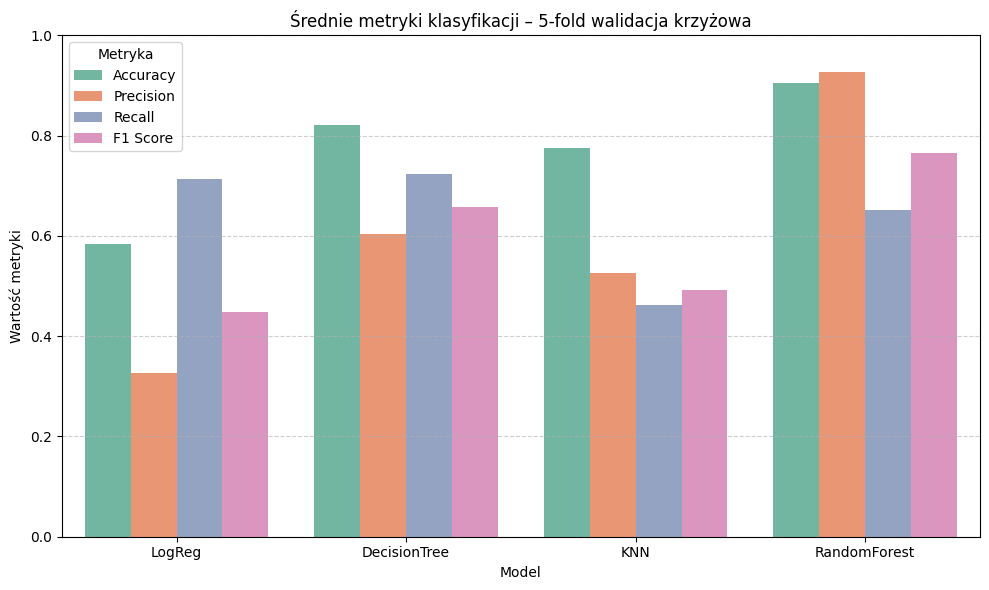

In [96]:
corss_df = pd.DataFrame(results)

df_melted = corss_df.melt(id_vars="Model", var_name="Metryka", value_name="Wartość")

plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x="Model", y="Wartość", hue="Metryka", palette="Set2")

plt.title("Średnie metryki klasyfikacji – 5-fold walidacja krzyżowa")
plt.ylim(0, 1)
plt.ylabel("Wartość metryki")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

### 7. Porównanie wyników
- tabela z wynikami
- macierze pomyłek

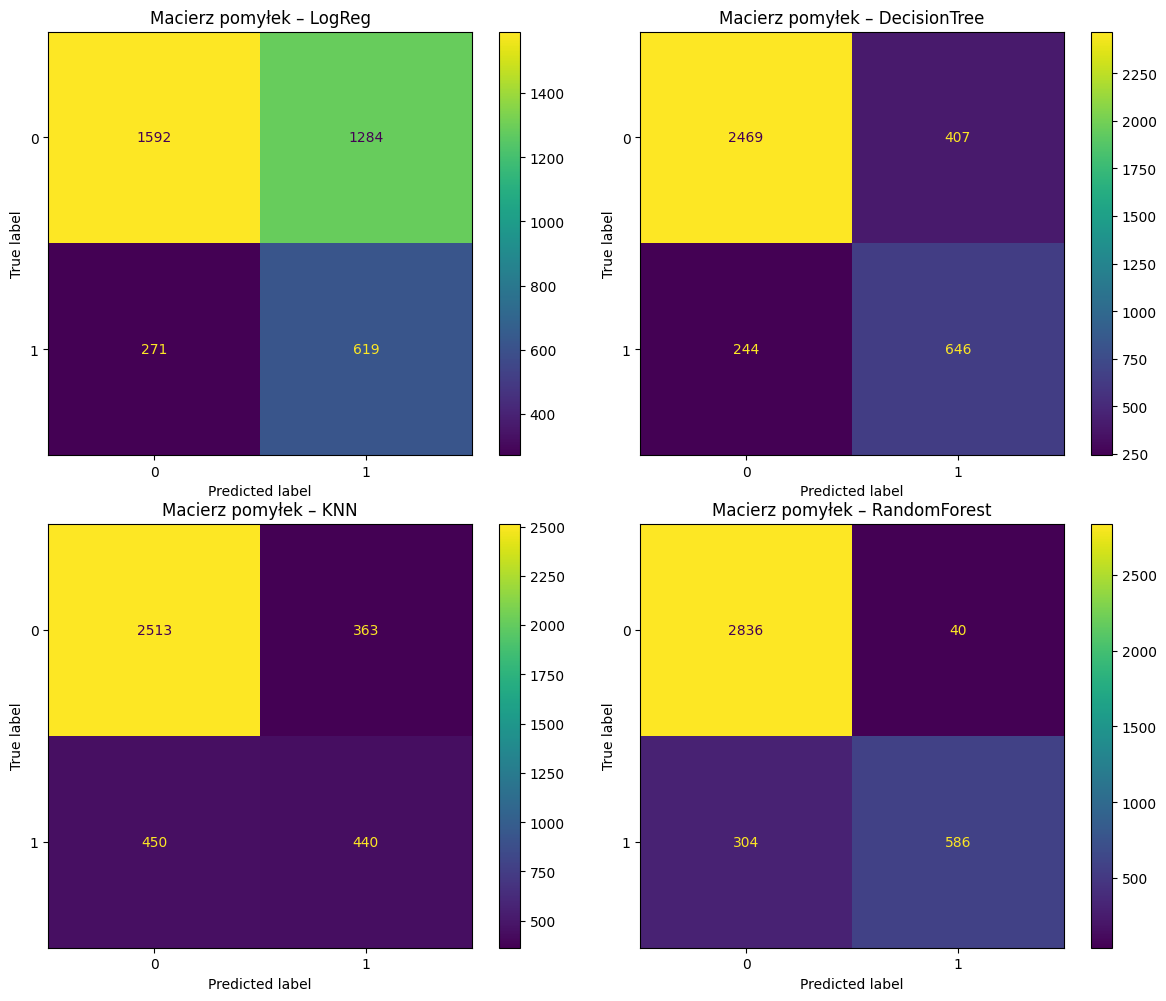

In [97]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(2, 2, figsize=(12, 10)) 
axes = axes.ravel() 

for idx, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[idx], values_format='d')
    axes[idx].set_title(f"Macierz pomyłek – {name}")

plt.tight_layout()
plt.show()

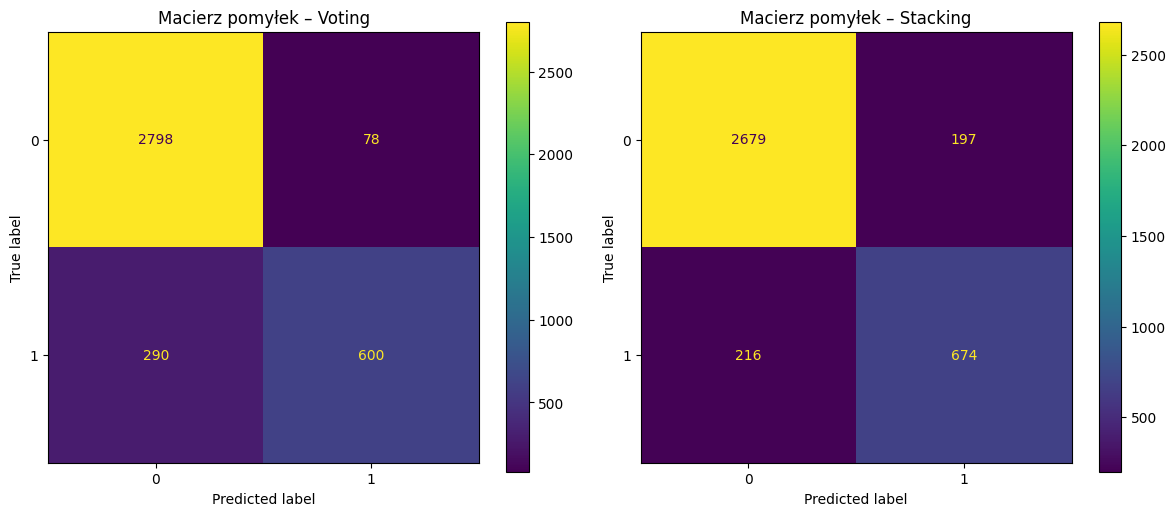

In [98]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_voting = voting.predict(X_test_scaled)
y_pred_stacking = stacking.predict(X_test_scaled)

# Oblicz macierze pomyłek
cm_voting = confusion_matrix(y_test, y_pred_voting)
cm_stacking = confusion_matrix(y_test, y_pred_stacking)

# Wykres
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Voting
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_voting)
disp1.plot(ax=axes[0], values_format='d')
axes[0].set_title("Macierz pomyłek – Voting")

# Stacking
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_stacking)
disp2.plot(ax=axes[1], values_format='d')
axes[1].set_title("Macierz pomyłek – Stacking")

plt.tight_layout()
plt.show()

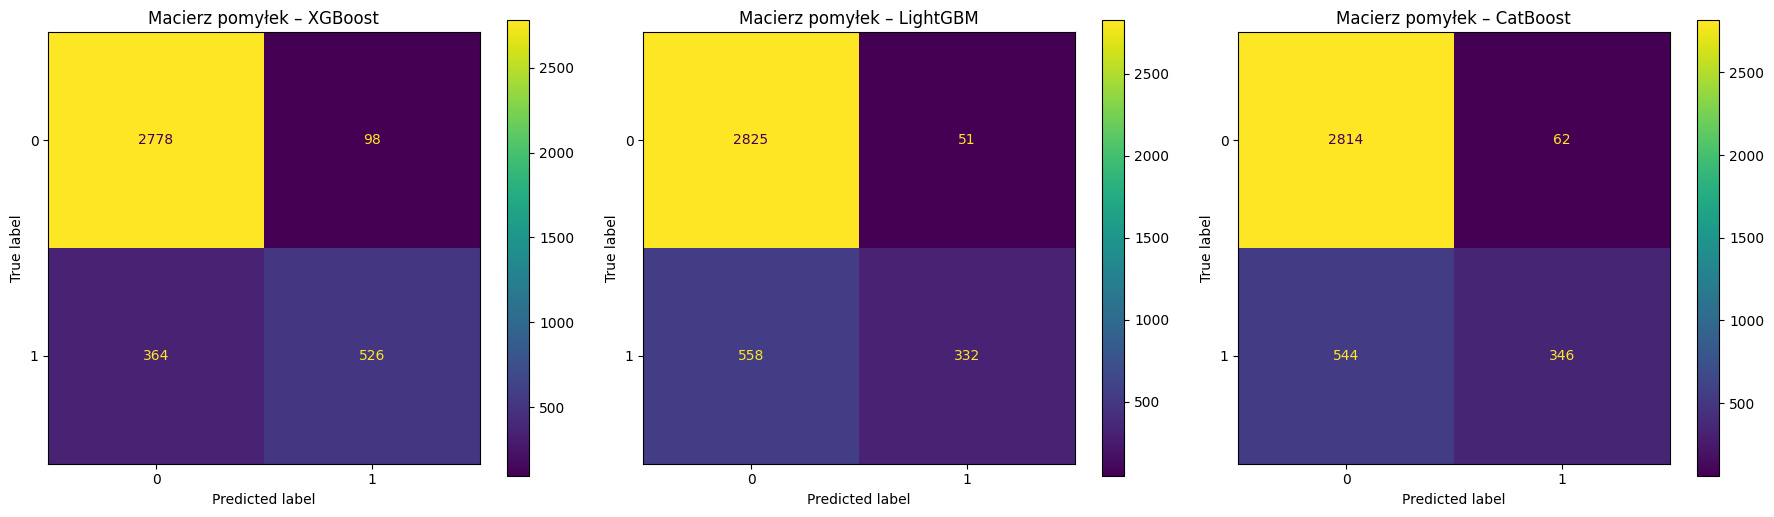

In [99]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (name, model) in enumerate(external_models.items()):
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[idx], values_format='d')
    axes[idx].set_title(f"Macierz pomyłek – {name}")

plt.tight_layout()
plt.show()


### Liczymy średnie metryki

In [100]:
all_models = {**models, **external_models, "Voting": voting, "Stacking": stacking}

all_results = []

for name, model in all_models.items():
    y_pred = model.predict(X_test_scaled)
    acc, prec, rec, f1 = manual_metrics(y_test, y_pred)
    all_results.append({
        "Model": name,
        "Accuracy": round(acc, 3),
        "Precision": round(prec, 3),
        "Recall": round(rec, 3),
        "F1 Score": round(f1, 3)
    })

all_results_df = pd.DataFrame(all_results).sort_values(by="F1 Score", ascending=False)
all_results_df

,Model,Accuracy,Precision,Recall,F1 Score
3,RandomForest,0.909,0.936,0.658,0.773
7,Voting,0.902,0.885,0.674,0.765
8,Stacking,0.890,0.774,0.757,0.765
4,XGBoost,0.877,0.843,0.591,0.695
1,DecisionTree,0.827,0.613,0.726,0.665
6,CatBoost,0.839,0.848,0.389,0.533
5,LightGBM,0.838,0.867,0.373,0.522
2,KNN,0.784,0.548,0.494,0.520
0,LogReg,0.587,0.325,0.696,0.443


## ETAP 3


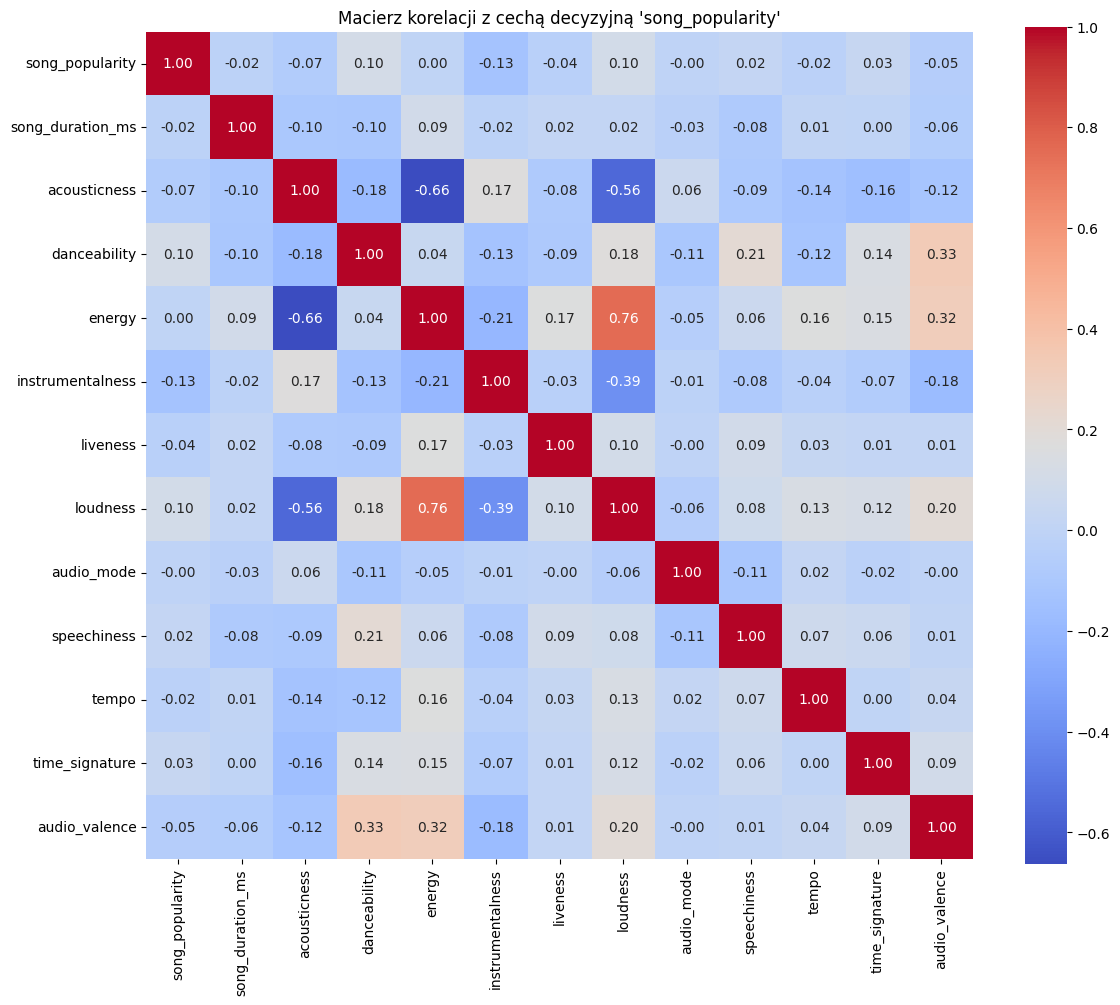

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = df.copy()

# Macierz korelacji z popularnością
plt.figure(figsize=(12, 10))
corr_matrix = df_corr.corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Macierz korelacji z cechą decyzyjną 'song_popularity'")
plt.tight_layout()
plt.show()



In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd

# SelectKBest z f_regression
k_best = SelectKBest(score_func=f_regression, k=10)
X_selected = k_best.fit_transform(X, y)

# Wyświetlenie wybranych nazw cech
mask = k_best.get_support()
selected_features = X.columns[mask]
print("Wybrane cechy przez SelectKBest:")
print(selected_features)


Wybrane cechy przez SelectKBest:
Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'audio_mode', 'speechiness', 'time_signature',
       'audio_valence'],
      dtype='object')


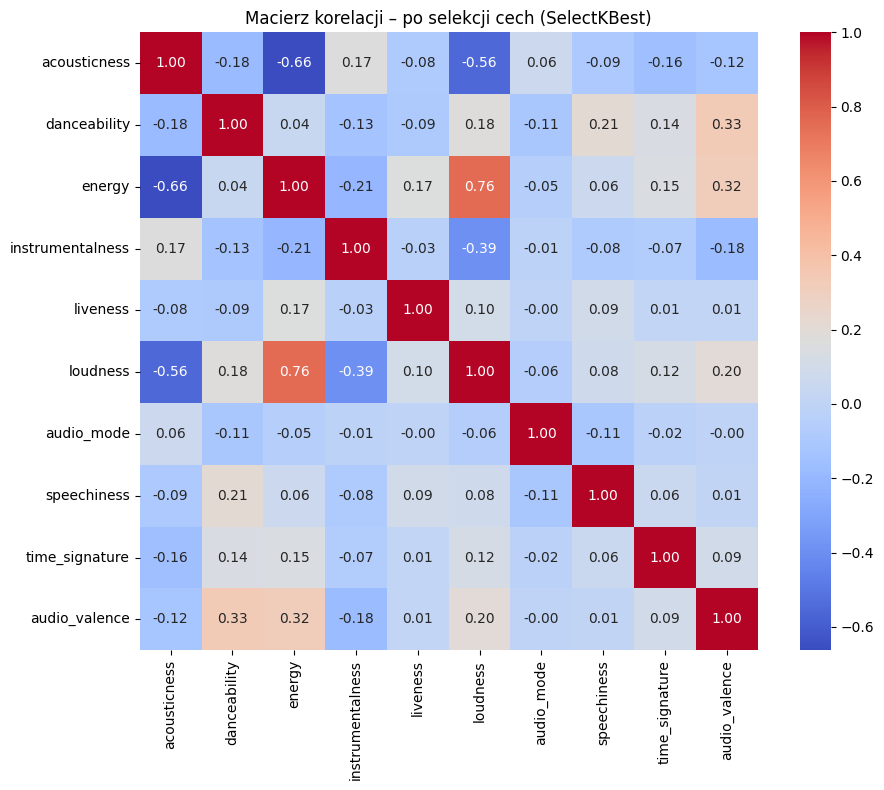

In [103]:
# Wyodrębnij dane tylko dla wybranych cech
df_selected = X[selected_features]

# Macierz korelacji dla wybranych cech
plt.figure(figsize=(10, 8))
corr_selected = df_selected.corr()

sns.heatmap(corr_selected, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Macierz korelacji – po selekcji cech (SelectKBest)")
plt.tight_layout()
plt.show()


Raport klasyfikacji:
              precision    recall  f1-score   support

           0      0.911     0.987     0.948      2876
           1      0.944     0.688     0.796       890

    accuracy                          0.917      3766
   macro avg      0.928     0.838     0.872      3766
weighted avg      0.919     0.917     0.912      3766



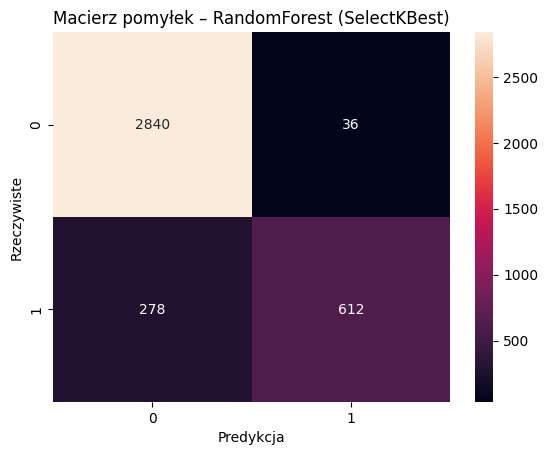

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Target binarny
y_binary = (df['song_popularity'] >= 70).astype(int)

# Wybrane cechy po SelectKBest
X_kbest = X[selected_features]

# Podział zbioru na train i test
X_train_kb, X_test_kb, y_train_kb, y_test_kb = manual_stratified_split(X_kbest, y)

# Trening modelu
rf_kb = RandomForestClassifier(random_state=42)
rf_kb.fit(X_train_kb, y_train_kb)

# Predykcja
y_pred_kb = rf_kb.predict(X_test_kb)

print("Raport klasyfikacji:")
print(classification_report(y_test_kb, y_pred_kb, digits=3))

cm = confusion_matrix(y_test_kb, y_pred_kb)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Macierz pomyłek – RandomForest (SelectKBest)")
plt.xlabel("Predykcja")
plt.ylabel("Rzeczywiste")
plt.show()


In [147]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Siatka hiperparametrów
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Konfiguracja GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_kb, y_train_kb)

print("Najlepsze parametry:")
print(grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test_kb)

acc, prec, rec, f1 = manual_metrics(y_test_kb, y_pred_best)
print(f"Accuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {rec:.3f}, F1 Score: {f1:.3f}")

print("\nRaport klasyfikacji – RandomForest po GridSearch:")
print(classification_report(y_test_kb, y_pred_best, digits=3))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.8s
[CV] END ma

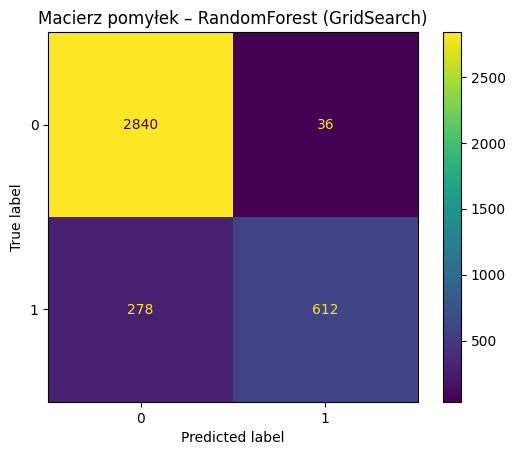

In [ ]:
# Macierz pomyłek
cm_grid = confusion_matrix(y_test_kb, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_grid)
disp.plot()
plt.title("Macierz pomyłek – RandomForest (GridSearch)")
plt.show()

In [111]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 300),
        "max_depth": trial.suggest_int("max_depth", 5, 30),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 5),
        'class_weight': 'balanced',
        'random_state': 42
    }

    clf = RandomForestClassifier(**params)

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1 = cross_val_score(clf, X_kbest, y_binary, cv=skf, scoring="f1", n_jobs=-1)
    return f1.mean()

# Uruchomienie Optuny
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Najlepsze parametry
print("Najlepsze parametry:")
print(study.best_params)


[I 2025-06-02 21:11:25,663] A new study created in memory with name: no-name-3f9dfd4e-807e-4973-8bbe-dd70b22a4471
[I 2025-06-02 21:11:30,167] Trial 0 finished with value: 0.6074922164783468 and parameters: {'n_estimators': 255, 'max_depth': 11, 'min_samples_split': 4, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.6074922164783468.
[I 2025-06-02 21:11:35,422] Trial 1 finished with value: 0.7934526924376775 and parameters: {'n_estimators': 254, 'max_depth': 26, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.7934526924376775.
[I 2025-06-02 21:11:39,691] Trial 2 finished with value: 0.7602056954005537 and parameters: {'n_estimators': 207, 'max_depth': 18, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.7934526924376775.
[I 2025-06-02 21:11:45,127] Trial 3 finished with value: 0.7632974052023271 and parameters: {'n_estimators': 275, 'max_depth': 25, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 1 with value

Najlepsze parametry:
{'n_estimators': 161, 'max_depth': 29, 'min_samples_split': 2, 'min_samples_leaf': 1}


In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Trening modelu na najlepszych parametrach
best_optuna_model = RandomForestClassifier(**study.best_params)
best_optuna_model.fit(X_train_kb, y_train_kb)

# Predykcja
y_pred_optuna = best_optuna_model.predict(X_test_kb)

# Ręczne metryki
acc, prec, rec, f1 = manual_metrics(y_test_kb, y_pred_optuna)
print(f"Accuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {rec:.3f}, F1 Score: {f1:.3f}")

# Klasyczny raport
print("\nRaport klasyfikacji – RandomForest (Optuna):")
print(classification_report(y_test_kb, y_pred_optuna, digits=3))

Accuracy: 0.917, Precision: 0.944, Recall: 0.688, F1 Score: 0.796

Raport klasyfikacji – RandomForest (Optuna):
              precision    recall  f1-score   support

           0      0.911     0.987     0.948      2876
           1      0.944     0.688     0.796       890

    accuracy                          0.917      3766
   macro avg      0.928     0.838     0.872      3766
weighted avg      0.919     0.917     0.912      3766



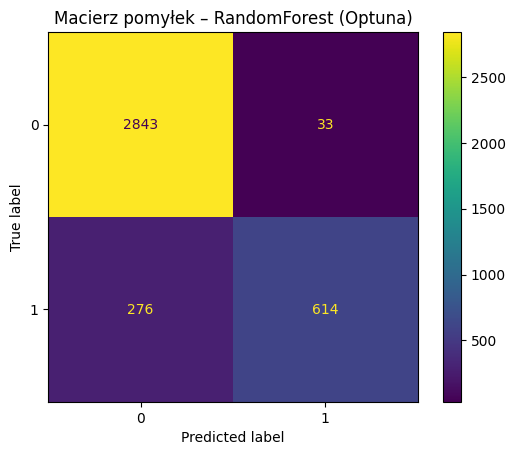

In [ ]:
# Macierz pomyłek
cm_opt = confusion_matrix(y_test_kb, y_pred_optuna)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_opt)
disp.plot()
plt.title("Macierz pomyłek – RandomForest (Optuna)")
plt.show()

/opt/homebrew/lib/python3.11/site-packages/tpot/tpot_estimator/estimator.py:456: UserWarning: Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.
  warnings.warn("Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.")
/opt/homebrew/lib/python3.11/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 62279 instead
  warnings.warn(
Generation:  90%|█████████ | 27/30 [1:00:00<06:40, 133.36s/it]


Raport klasyfikacji – TPOT:
              precision    recall  f1-score   support

           0      0.916     0.979     0.947      2876
           1      0.912     0.711     0.799       890

    accuracy                          0.916      3766
   macro avg      0.914     0.845     0.873      3766
weighted avg      0.915     0.916     0.912      3766



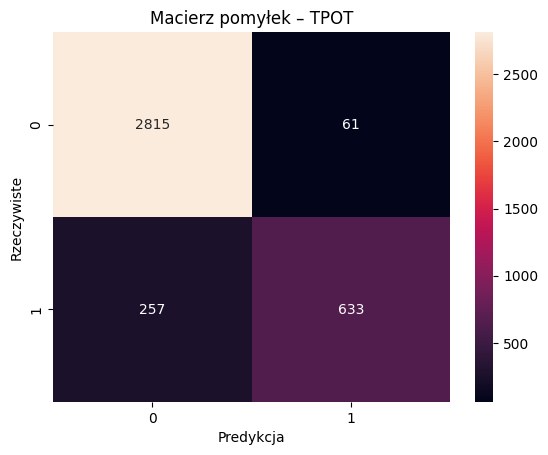

In [ ]:
from tpot import TPOTClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, make_scorer
import seaborn as sns
import matplotlib.pyplot as plt

f1 = make_scorer(f1_score)

tpot = TPOTClassifier(
    generations=30,
    population_size=50,
    cv=5,
    random_state=42,
    n_jobs=6
)

# Ustaw scoring osobno
tpot.fitted_pipeline_ = None  # workaround na wypadek wcześniejszych uruchomień
tpot.scorer_ = f1

tpot.fit(X_train, y_train)

# Predykcja i ewaluacja
y_pred_tpot_0 = tpot.predict(X_test)

print("Raport klasyfikacji – TPOT:")
print(classification_report(y_test, y_pred_tpot_0, digits=3))

# Macierz pomyłek
cm = confusion_matrix(y_test, y_pred_tpot_0)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Macierz pomyłek – TPOT")
plt.xlabel("Predykcja")
plt.ylabel("Rzeczywiste")
plt.show()

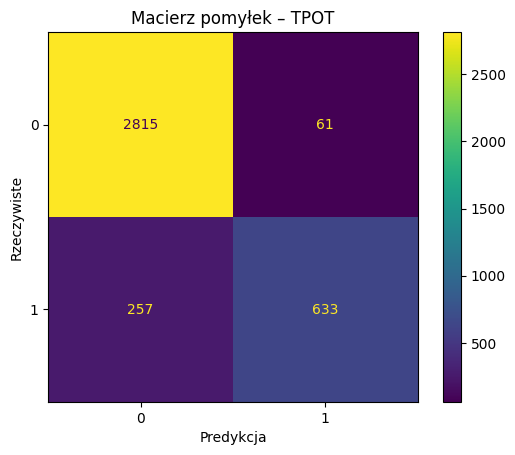

In [140]:
# Macierz pomyłek
cm_tpot = confusion_matrix(y_test, y_pred_tpot_0)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tpot)
disp.plot()
plt.title("Macierz pomyłek – TPOT")
plt.xlabel("Predykcja")
plt.ylabel("Rzeczywiste")
plt.show()


In [ ]:
f1_2 = make_scorer(f1_score)

# TPOT – wersja pełna
tpot_2 = TPOTClassifier(
    generations=45,
    population_size=75,
    cv=5,
    random_state=42,
    max_time_mins=500,
    n_jobs=6
)

# Ustaw scoring osobno
tpot_2.fitted_pipeline_ = None  # workaround na wypadek wcześniejszych uruchomień
tpot_2.scorer_ = f1_2

tpot_2.fit(X_train, y_train)

# Predykcja i ewaluacja
y_pred_tpot_2 = tpot_2.predict(X_test)

print("Raport klasyfikacji – TPOT:")
print(classification_report(y_test, y_pred_tpot_2, digits=3))

/opt/homebrew/lib/python3.11/site-packages/tpot/tpot_estimator/estimator.py:456: UserWarning: Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.
  warnings.warn("Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.")
/opt/homebrew/lib/python3.11/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 64212 instead
  warnings.warn(
Generation: 100%|██████████| 45/45 [4:22:04<00:00, 349.43s/it]  
/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:307: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 7 are removed. Cons

Raport klasyfikacji – TPOT:
              precision    recall  f1-score   support

           0      0.914     0.989     0.950      2876
           1      0.950     0.698     0.804       890

    accuracy                          0.920      3766
   macro avg      0.932     0.843     0.877      3766
weighted avg      0.922     0.920     0.915      3766



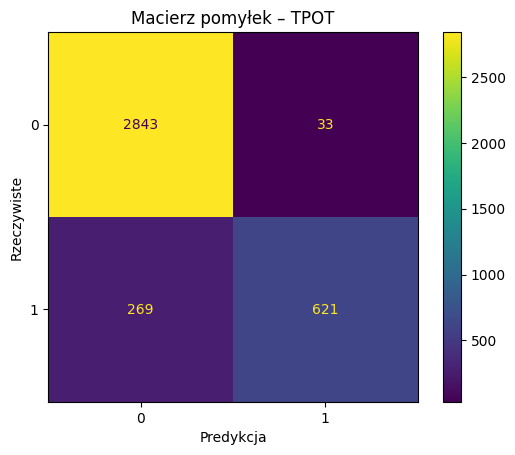

In [141]:
# Macierz pomyłek
cm_2 = confusion_matrix(y_test, y_pred_tpot_2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_2)
disp.plot()
plt.title("Macierz pomyłek – TPOT")
plt.xlabel("Predykcja")
plt.ylabel("Rzeczywiste")
plt.show()